# Softmax - MNIST

En este notebook vamos a ver la implementación de Softmax en NumPy para clasificación multiclase. Vamos a aplicar el modelo al dataset de dígitos escritos a mano de la clase 2. 

## Cargamos las Librerías

In [35]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import itertools
import random
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


RANDOM_STATE = 17

## Cargamos el Dataset

In [36]:
# Cargamos los datos

X, y = load_digits(return_X_y=True)
print('Formato del dataset: {}'.format(X.shape))

Formato del dataset: (1797, 64)


In [37]:
print('Formato de las etiquetas: {}'.format(y.shape))

Formato de las etiquetas: (1797,)


In [38]:
clases = np.unique(y)
print(clases)

[0 1 2 3 4 5 6 7 8 9]


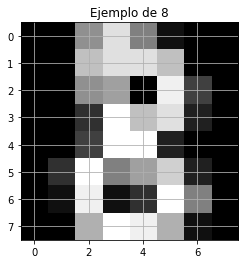

In [39]:
# Cargamos una muestra

plt.grid(True)
plt.title("Ejemplo de {}".format(y[8]))
plt.imshow(X[8, :].reshape((8, 8)), cmap='gray')

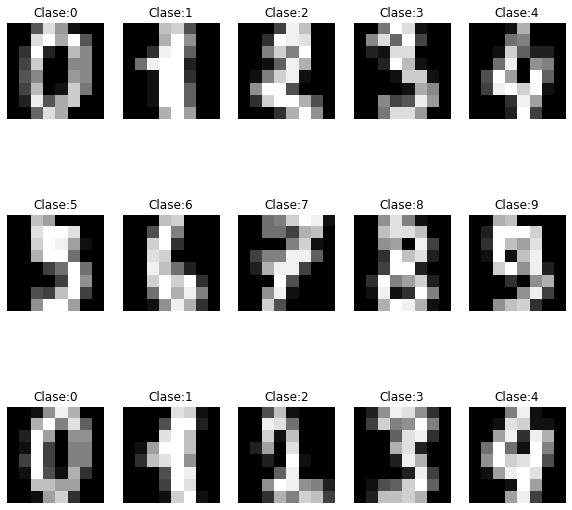

In [40]:
# Graficamos varias muestras

fig = plt.figure(figsize=(10, 10))
for i in range(15):  
    ax = fig.add_subplot(3, 5, i+1)
    ax.imshow(X[i].reshape(8, 8), cmap=plt.get_cmap('gray'))
    ax.set_title('Clase:{y}'.format(y=y[i]))
    plt.axis('off')

In [41]:
# Split del dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [42]:
X_train.shape

(1437, 64)

In [43]:
y_train.shape

(1437,)

## Implementación con Scikit Learn (Carlos)

In [50]:
np.max(X_train)

16.0

In [51]:
# Escalamos las features

X_train_s = X_train / 16
X_test_s = X_test / 16

In [52]:
log_reg = LogisticRegression(random_state = RANDOM_STATE, C = 1000, solver = 'newton-cg', multi_class='multinomial')
log_reg.fit(X_train_s, y_train)

predictions = log_reg.predict(X_test_s)

### Predicciones y Matriz de Confusión

In [53]:
def getConfusionMatrix(truth, prediction, c):

    conf_mtx =[]
    
    for _ in range(c):
        conf_mtx.append([])
        for _ in range(c):
            conf_mtx[-1].append(0)

    for i in range(truth.shape[0]):
        conf_mtx[int(truth[i])][int(prediction[i])] += 1
    
    conf_mtx = np.array(conf_mtx)
    
    conf_mtx = conf_mtx.astype('float') / conf_mtx.sum(axis=1)[:, np.newaxis]
    
    return conf_mtx

In [54]:
def plotConfusionMatrix(conf_mtx, c):
    plt.figure(figsize=(15,15))
    plt.imshow(conf_mtx, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()

    tick_marks = np.arange(c)
    plt.xticks(tick_marks, np.arange(c) , rotation=45)
    plt.yticks(tick_marks, np.arange(c))

    fmt = '.2f'
    thresh = conf_mtx.max() / 2.

    for i, j in itertools.product(range(conf_mtx.shape[0]), range(conf_mtx.shape[1])):
        plt.text(j, i, format(conf_mtx[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if conf_mtx[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In [55]:
print("Accuracy: {}".format(metrics.accuracy_score(y_test, predictions)))

Accuracy: 0.9638888888888889


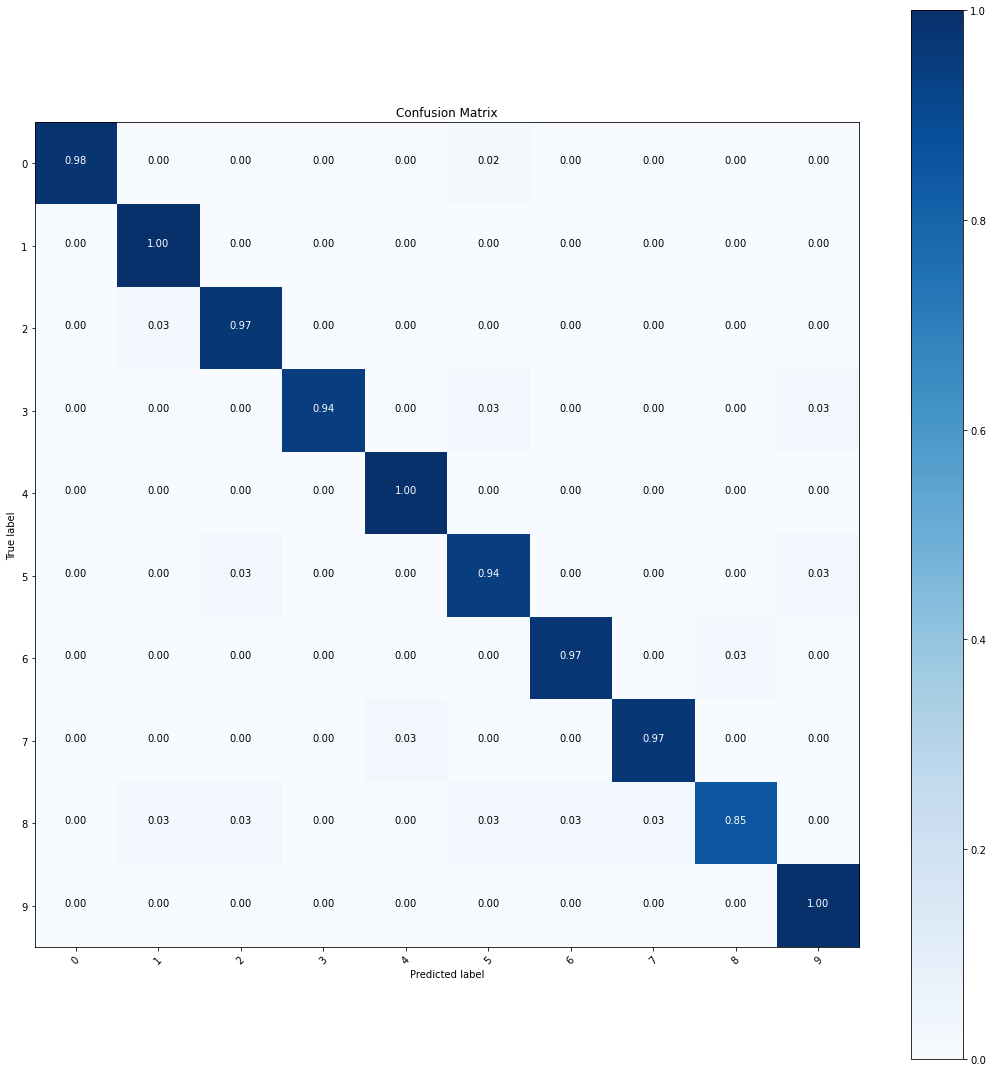

In [56]:
conf_mtx = getConfusionMatrix(y_test, predictions, 10)
plotConfusionMatrix(conf_mtx, 10)

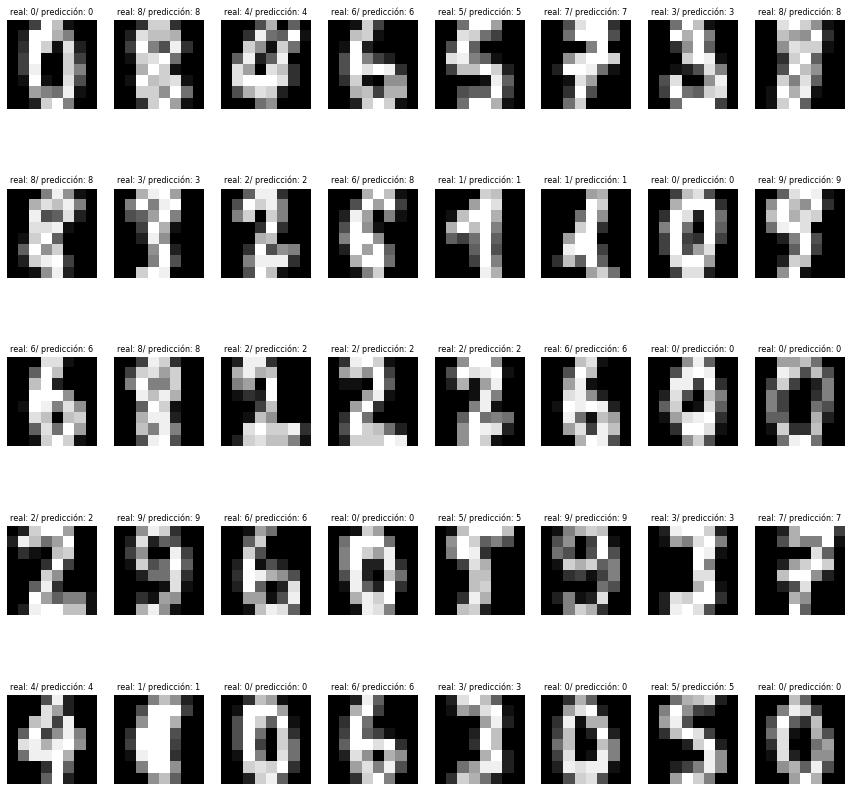

In [57]:
fig = plt.figure(figsize=(15,15))

for i in range(40):  
    ax = fig.add_subplot(5, 8, i+1)
    ax.imshow(X_test[i].reshape(8, 8), cmap=plt.get_cmap('gray'))    
    ax.set_title('real: {y}/ predicción: {y_hat}'.format(y=y_test[i], y_hat=predictions[i]), fontsize=8)
    plt.axis('off')